('score', 0.998775)
1美
('score', 0.995131)
2创
('score', 0.994765)
3国
('score', 0.993483)
4斯
('score', 0.990849)
5国
('score', 0.988349)
6品
('score', 0.987947)
7国
('score', 0.987859)
8全
('score', 0.987443)
9中
('score', 0.986807)
10国
('score', 0.986258)
11牌
('score', 0.986167)
12国
('score', 0.985738)
13中
('score', 0.985248)
14商
('score', 0.982908)
15名
('score', 0.982705)
16品
('score', 0.982697)
17产
('score', 0.982233)
18热
('score', 0.98185)
19中
('score', 0.980229)
20国
('score', 0.979536)
21牌
('score', 0.978847)
22产
('score', 0.97868)
23牌
('score', 0.978471)
24器
('score', 0.977415)
25联
('score', 0.975921)
26品
('score', 0.975628)
27水
('score', 0.975472)
28年
('score', 0.974476)
29用
('score', 0.973774)
30欧
('score', 0.971694)
31名
('score', 0.971478)
32大
('score', 0.969881)
33品
('score', 0.969362)
34商
('score', 0.968942)
35名
('score', 0.968797)
36长
('score', 0.967305)
37方
('score', 0.966964)
38标
('score', 0.965423)
39陶
('score', 0.964361)
40标
('score', 0.964176)
41业
('score', 0.962036)
42一
('s

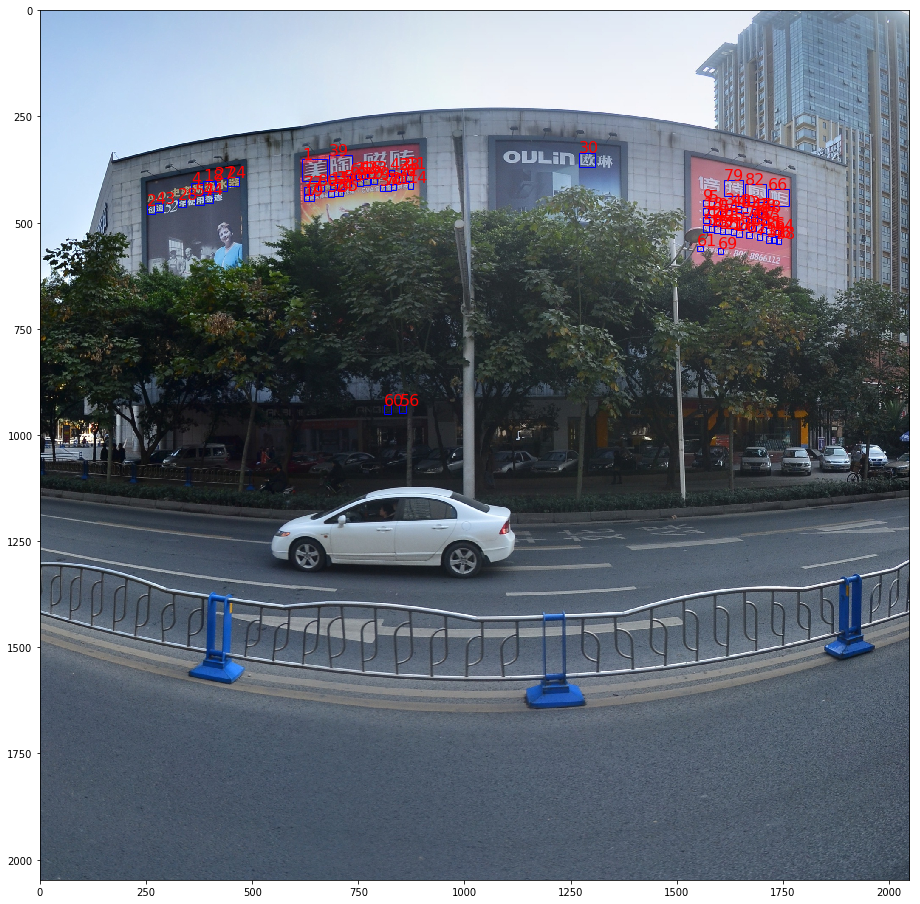

In [27]:
import cv2
import json
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import os
import settings
import shutil
import re

from pythonapi import anno_tools

%matplotlib inline


with open('/home/wudao/ctw/ctw-baseline-master/ssd/products/detections.jsonl') as f:
    lines = f.read().splitlines()
#with open('/home/wudao/ctw/ctw-annotations/train.jsonl') as f:
#    anno = json.loads(f.readline())
for line in lines:  
    det = json.loads(line.strip())
    filename = det['image_id']+'.jpg'
    #if(filename != "1001678.jpg"):2033369.jpg 1045412.jpg 1032407.jpg
    if(filename != "1005180.jpg"):
        #
        continue
            
    path = os.path.join(settings.TEST_IMAGE_DIR, filename)
    shutil.copy(path,"./")
    assert os.path.exists(path), 'file ot exists: {}'.format(path)
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(16, 16))
    ax = plt.gca()
    plt.imshow(img)
    count = 0
    
    for block in det['detections']:
            count += 1
            score = block['score']            
           # print("score > 0.8", score > 0.8)
            if score > 0.8:
                print("score",score)
                box = block['bbox']
                text = block['text']
                print(str(count) + "" +text)
            
            #if(re.match(u'^\u4e2d', text) or re.match(u'^\u56fd', text)):
                rect=patches.Rectangle((box[0],box[1]),box[2],box[3],linewidth=1,edgecolor='blue',facecolor='none')    
                ax.add_patch(rect)
                plt.text(box[0], box[1], str(count), fontdict={'size': 16, 'color': 'r'})

    plt.show()
   # print(anno['file_name'])